# Using the CRISP-DM Method for MLN 601 Machine Learning
# Decision Tree


## Important:

- **This notebook requires the `Pandas`, `Numpy`, `Scikit-learn`, `matplotlib`, `graphviz` and `seaborn` packages to be installed.**


- I deleted all the instructions from the CRISP-DM template, all of the markdowns below are my writings.

# Red Wine Data set model

# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor"></a>


## 1.1 Assess the Current Situation<a class="anchor"></a>


- **Personnel:** Berat Eren Dincer

- **Data:**
    - **Overview :** The dataset has wine samples from North of Portugal. The goal is to model their quality based on their physicochemical test results.
    - **Source :** This dataset is an external dataset that is accessible on https://archive.ics.uci.edu/dataset/186/wine+quality
    - **Quality and Relevance :** The dataset has no missing values. The dataset is highly related to the business problem we have.

    
- **Software:** 
    - **Programming Language:** Python
    - **Data Science Tools**: Jupyter Notebook
    - **Libraries**: Pandas, Numpy, Scikit-learn, matplotlib, seaborn, statsmodels
    
    
#### Business Objectives:

- Our main business objective is to improve the red wine production quality and improve customer satisfaction. After this analysis, wine producers will have a better understanding of physicochemical characteristics that influence wine quality. Therefore, they can refine their production processes and they can produce high quality products that can be presented to their customers. 

- **We will use classification techniques.**



#### Understanding the Problem:

###### - **We will accept the wine samples that has a score smaller than 6 as low quality (0) and if they have a score of 6 or bigger than 6 we will accept them as high quality (1). We will perform this in 3.3 Assigning Labels section.**

- Wine quality is subjective and can vary based on individual preferences. Traditionally, it is assessed by human experts and it can be a time-consuming and inconsistent process. However, the quality of wine is also influenced by its physicochemical properties which are measurable. By leveraging these properties, we aim to develop a predictive model that can provide an objective assessment of wine quality.


#### What We Are Trying to Achieve:

- **Predictive Modelling:** We want to develop a machine learning **classification** model that can predict if a wine sample has a high or low quality by using the physicochemical test results. This will provide a baseline that can assist traditional tasting methods.

- **Insights into Important Factors:** Through the analysis, we also want to identify which physicochemical traits have the most significant influence on wine quality. This can guide wine producers in focusing on specific aspects of the production process.

- **Business Impact**: Consistently producing high-quality wine can lead to increased brand loyalty, higher sales and the potential to charge premium prices in the long run.

# 2. Stage  Two - Data Understanding <a class="anchor"></a>


## 2.1 Initial Data Acquisition <a class="anchor"></a>


In [2]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import graphviz

# Important:

Normally this notebook was reading the dataset from the URL link. Bu today (12/11/2023) I had an SSL cerficate error from the website. So I found the same dataset and downloaded it and my notebook file will read the dataset from there.

In [3]:
# The data was acquired by using the URL link.

# Data source: https://archive.ics.uci.edu/dataset/186/wine+quality
# Source Query location: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

# But because of an SSl error we had to read the file from our local machine

df = pd.read_csv("winequality-red.csv", sep=';')

## 2.2 Describe Data <a class="anchor"></a>


In [189]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

These are the columns we have on our dataset.

In [190]:
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Here we can see the 1st 5 rows of the red wine dataset. 

In [191]:
df.shape

(1599, 12)

Our dataset has 1599 rows (1599 different wine sample) and 12 columns (12 different feature of each red wine).

In [192]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Here we can see the data type of each column we have in the dataset.

In [193]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Here we can see different summary statistics of our columns. We can make inferences from here. For example:
* There is a broad range in both free and total sulfur dioxide levels, we can say this by looking at their high Standard deviation values
* When we look at the standard variation value of Density, we can say that there is not a wide spread in the data

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Here we can see various features of the dataset, for example:

* Our data set has no missing data.
* All data points are numerical and they are either float or integer.

- After making the inital explorations, we can say that we have enough features and records to solve the business problem we have.

## 2.3 Verify Data Quality <a class="anchor"></a>

Examine the quality of the data:

- Is the data complete (does it cover all that you require)?
- Is it correct, or does the data contain errors ?
- Are there missing values in the data? If so, where do they occur?

In [195]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

When we look at the features that wine samples have, we can say that we have all the features it requires to evaluate the wine quality.

In [196]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

As we can see, we have 240 duplicated instances. We will remove them in advance.

In [197]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

This code line returned the count of the missing values in each column. Since they are all zero, we can say that the data set is complete and there is no missing data points.

### 2.3.1. Outliers <a class="anchor"></a>

In [198]:
# Checking if the data has any outliers (Even though it says we dont need to worry about the outliers)

# Defining a function to find to calculate the upper and lower limits 
# Instead of multiplying IQR with 3 I did it with 1.5

def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.05)
    quartile3 = dataframe[col_name].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [199]:
# Defining the function to check outliers
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True 
    else:
        return False 

In [200]:
# The ones that returns True have outliers
for col in df.columns:
    print(col, check_outlier(df, col))

fixed acidity False
volatile acidity False
citric acid False
residual sugar True
chlorides True
free sulfur dioxide False
total sulfur dioxide True
density False
pH False
sulphates True
alcohol False
quality False


- Seems like we have outliers in `residual sugar`, `chlorides`, `total sulfur dioxide` and `sulphates` columns. Let's visualize them via box plots.

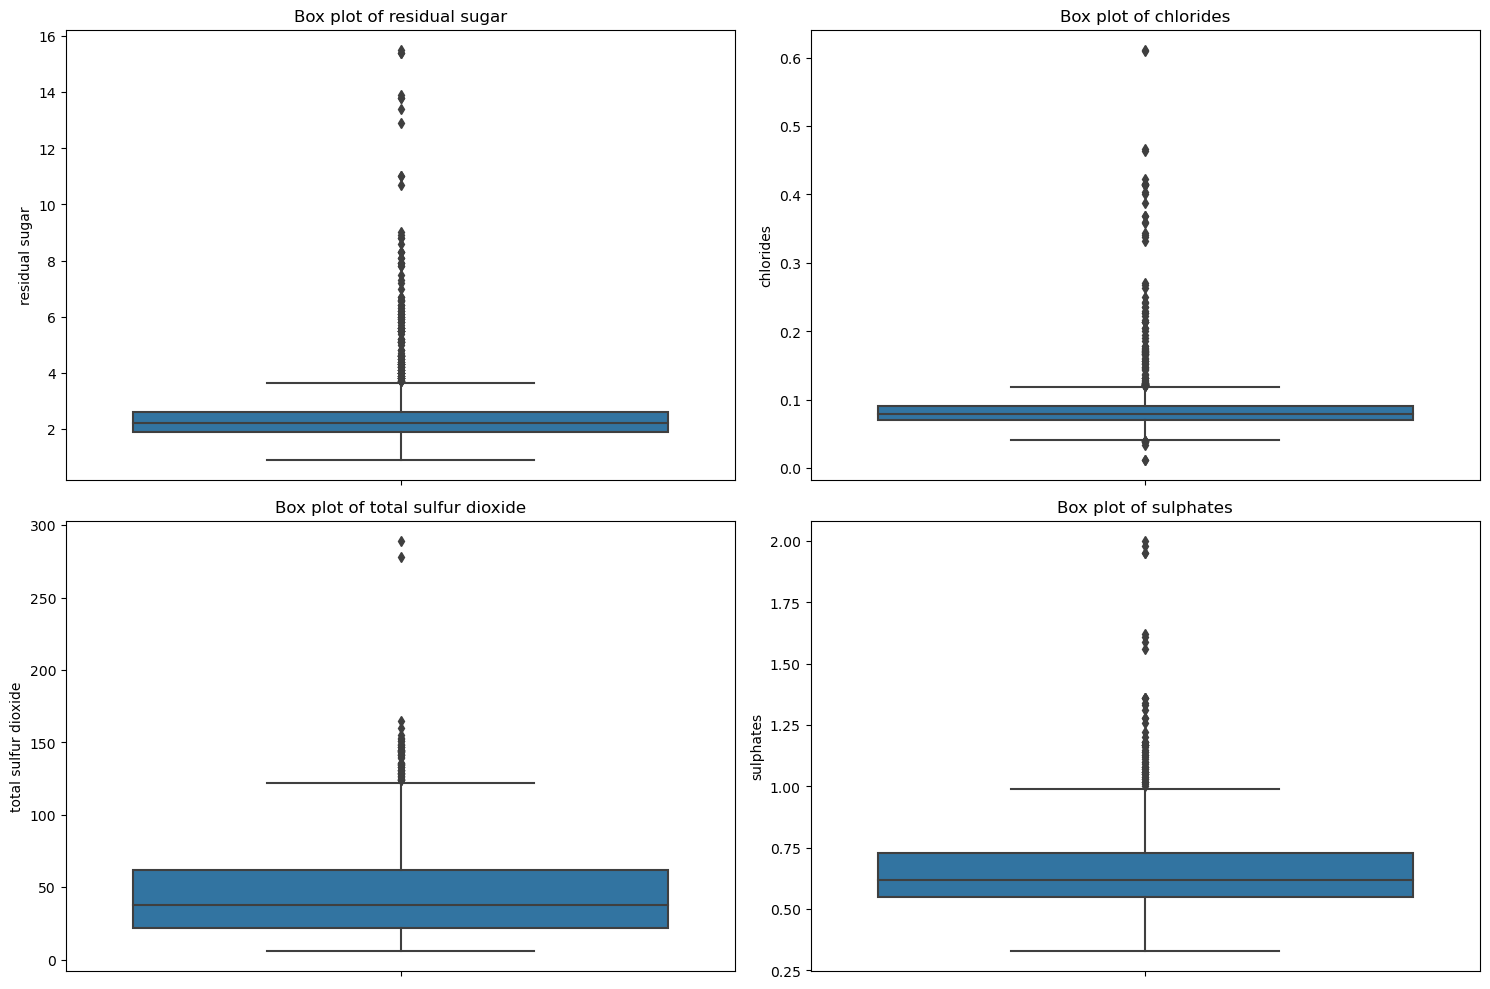

In [201]:
# List of columns with outliers
columns_with_outliers = ['residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates']

# Setting the size for the plots
plt.figure(figsize=(15,10))

# Looping through the columns to plot box plots
for i, column in enumerate(columns_with_outliers, 1):
    # 2x2 grid for 4 plots
    plt.subplot(2, 2, i)  
    sns.boxplot(y=df[column])
    plt.title(f"Box plot of {column}")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

- Those dot-like shapes over the maximum line represent the outliers.

- We will first run our model with the dataset has outliers and then we will remove outliers and run it again to compare scores.

## 2.4 Initial Data Exploration  <a class="anchor"></a>

### 2.4.1 Distributions  <a class="anchor"></a>

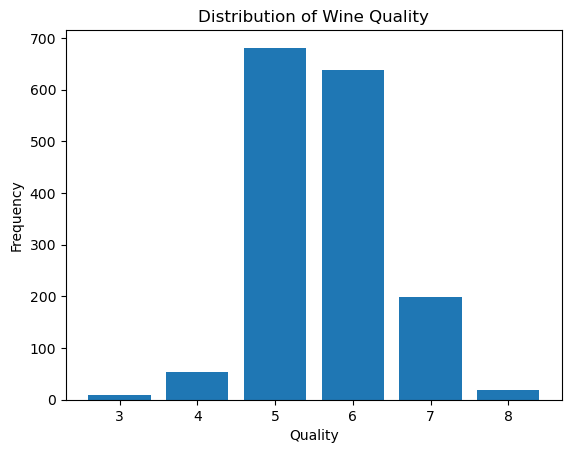

In [202]:
# Plot a histogram for the 'quality' column of the dataframe 'df'
# 'bins' determines the bins' edges. Here, it ranges from 3 to 9.
# 'align' positions the bins' edges to the left.
# 'rwidth' sets the relative width of the bars as a fraction of the bin width.

plt.hist(df['quality'], bins=range(3,10), align='left', rwidth=0.8)

# Label the x-axis as 'Quality'
plt.xlabel('Quality')

# Label the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Set the title for the plot
plt.title('Distribution of Wine Quality')

# Display the plot
plt.show()

* There is a little left skewed distribution. Most of the scores are higher than 5 in the dataset.
* Very few wine samples have a quality score of 3, 4 or 8. 

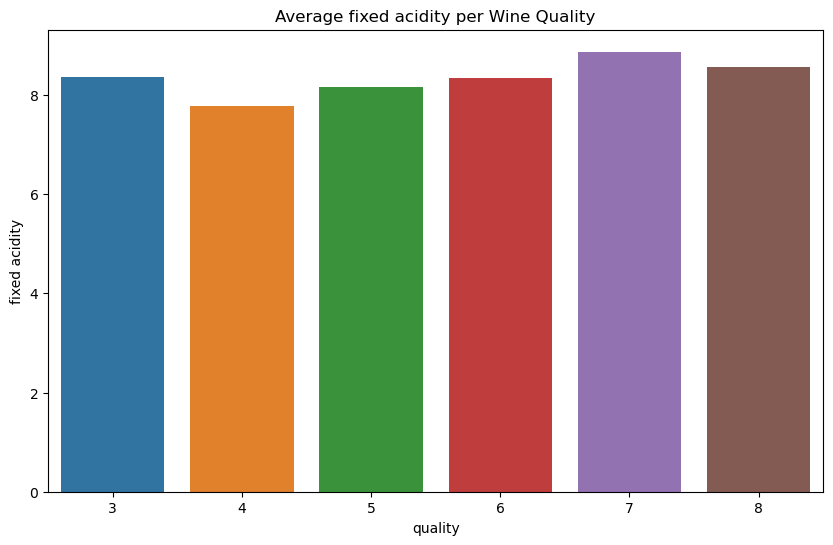

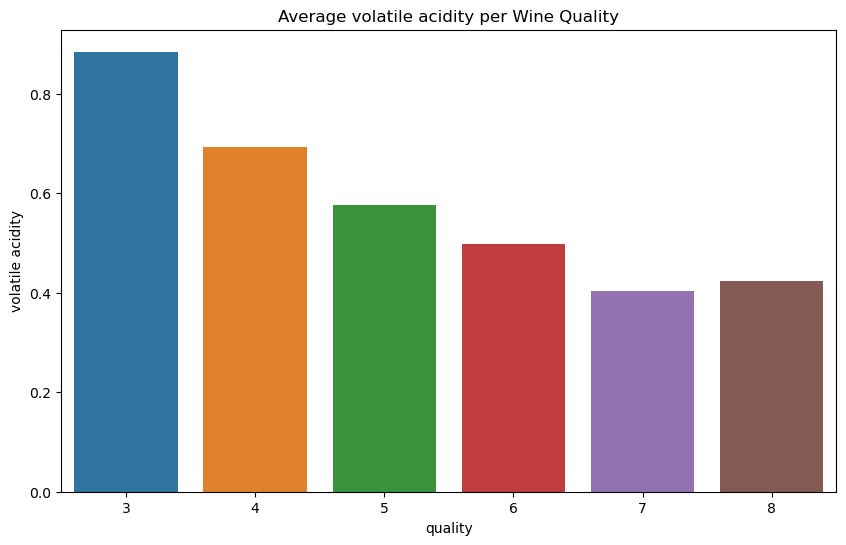

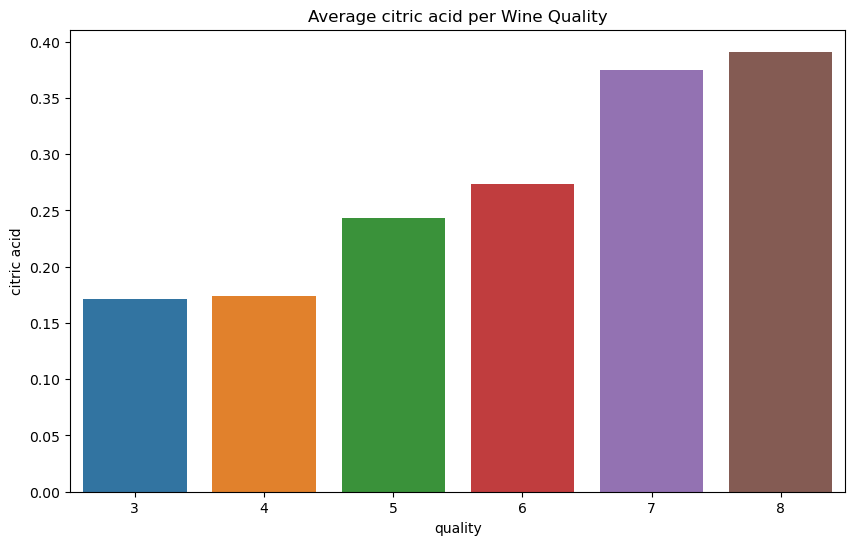

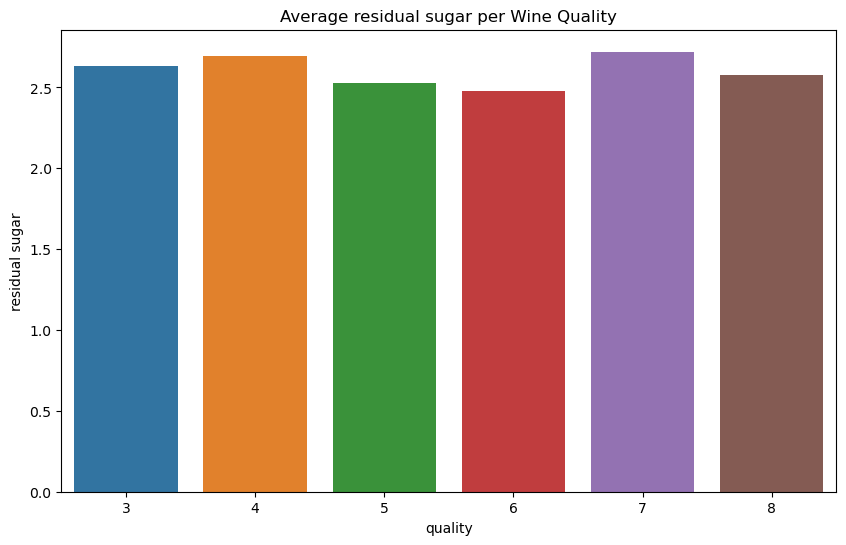

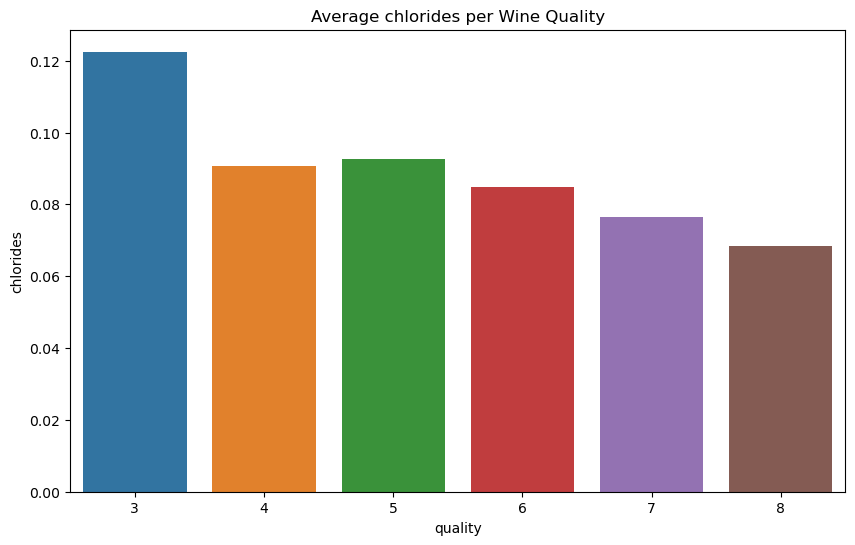

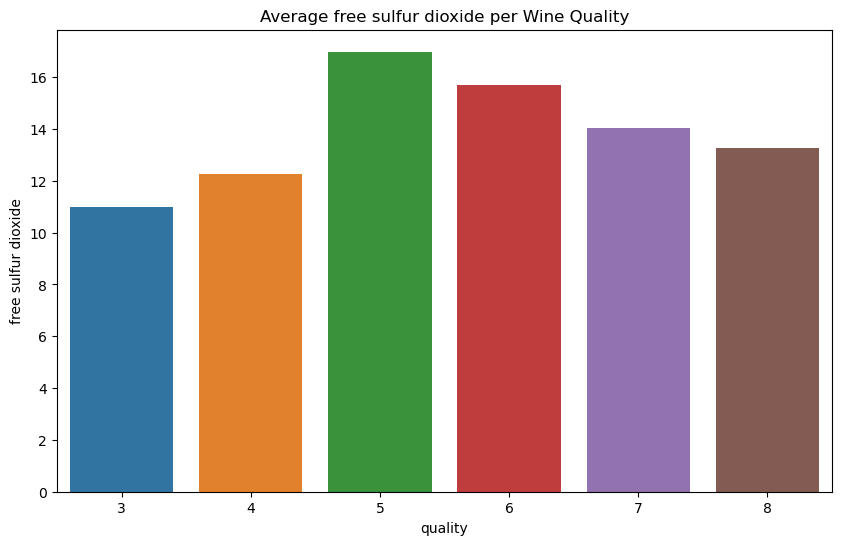

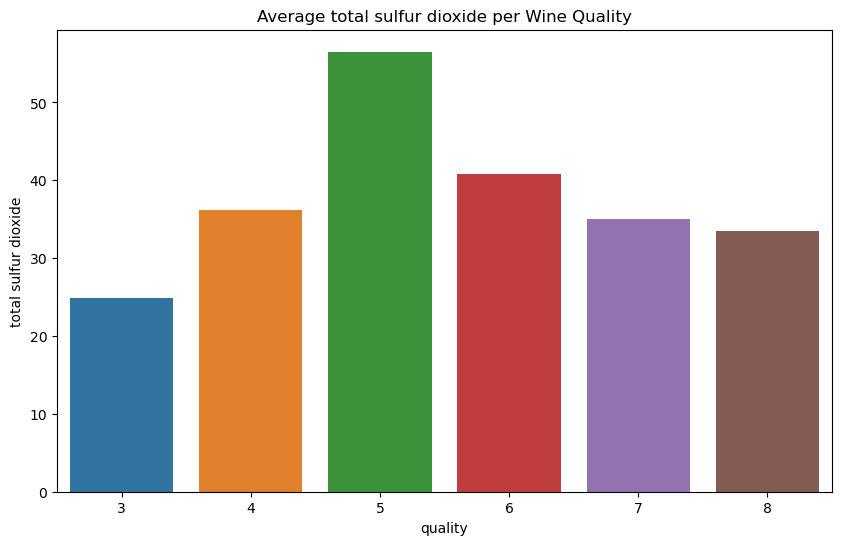

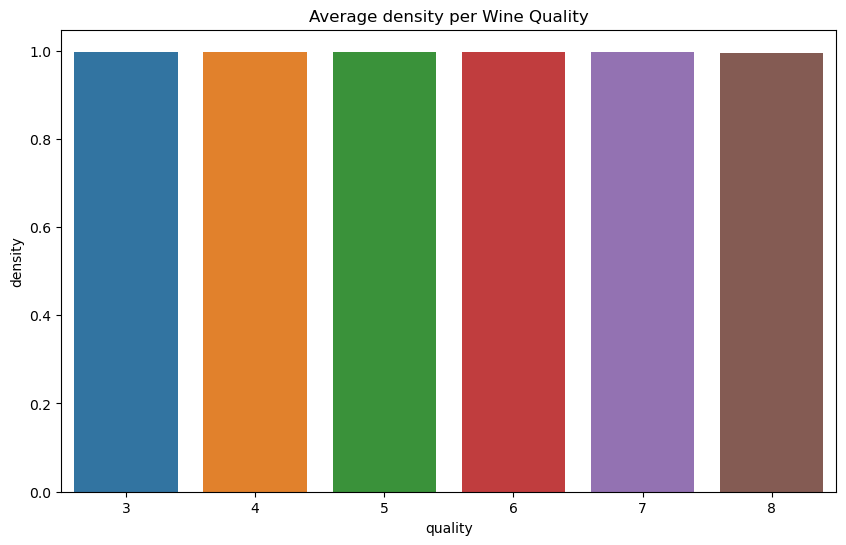

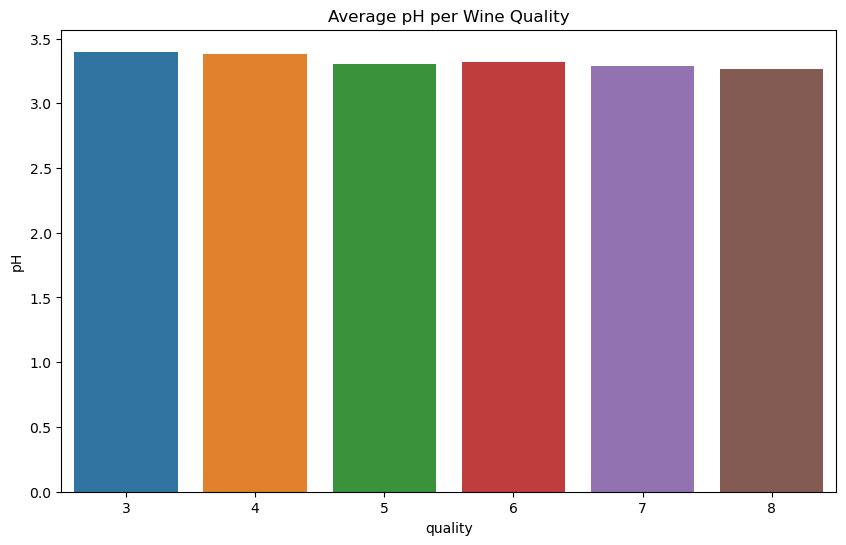

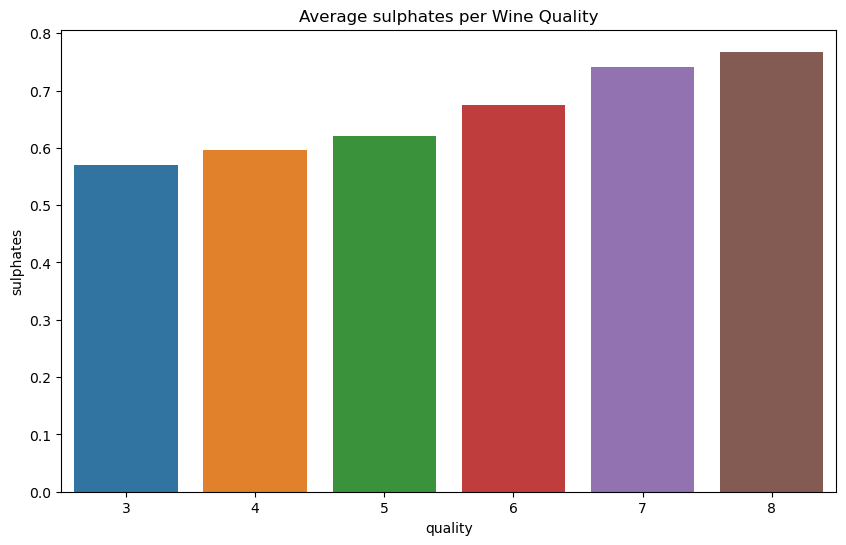

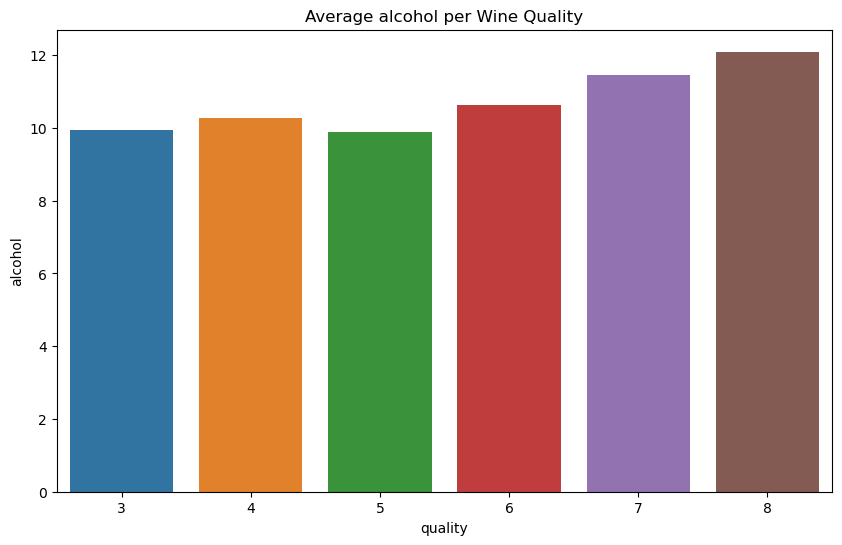

In [203]:
# We can show the relation between wine quality scores and features.
# Columns to iterate through
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']

# Iterate through columns and plot their relation with 'quality' using bar plots
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='quality', y=col, errorbar=None)
    plt.title(f'Average {col} per Wine Quality')
    plt.show()

- When we look at these bars we can say alcohol amount and quality score has almost a positive relationship and if the alcohol amount increases, the quality score also increases.
- There is also same relationship between sulphates and quality.
- But we need to know that this alone cannot say us the features ,that have linear relationship between quality, are the best features to predict the wine quality score.

In [204]:
# We can perform simple aggregations for the data

# Group the dataset by the 'quality' column and return the mean of the 'alcohol' amount for each quality group.
df.groupby('quality')['alcohol'].mean().reset_index(name='Average Alcohol Amount')

quality  Average Alcohol Amount
0        3                9.955000
1        4               10.265094
2        5                9.899706
3        6               10.629519
4        7               11.465913
5        8               12.094444

In [205]:
# We can also assign this grouping into a variable to plot or to use in any other form

average_alcohol = df.groupby('quality')['alcohol'].mean().reset_index(name='Average Alcohol Amount')
average_alcohol 

quality  Average Alcohol Amount
0        3                9.955000
1        4               10.265094
2        5                9.899706
3        6               10.629519
4        7               11.465913
5        8               12.094444

We can see here the average alcohol amount in each quality group. For example we can say:

* The wine samples that have the highest quality score have the highest alcohol amount

In [206]:
# Group the dataset by the 'quality' column and return the mean of the 'fixed acidity' for each quality group.
df.groupby('quality')['fixed acidity'].mean().reset_index(name='Average Fixed Acidity')

quality  Average Fixed Acidity
0        3               8.360000
1        4               7.779245
2        5               8.167254
3        6               8.347179
4        7               8.872362
5        8               8.566667

We can see here the average fixed acidity in each quality group. For example we can say:

* There is no consistent relation between wine quality scores and fixed acidity as the score is not increasing or decreasing linearly with the fixed acidity.

In [207]:
# We can check the properties of significant sub-populations
# For example we can see the summary statistics of the wine samples that have 
# quality score 8.


# Filter the dataset and include only the rows where the wine quality is 8.
# This will create a new dataset called 'high_quality'.
high_quality = df[df['quality'] == 8]

# Use the 'describe()' method on the 'high_quality' dataframe.
high_quality.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count      18.000000         18.000000    18.000000       18.000000   
mean        8.566667          0.423333     0.391111        2.577778   
std         2.119656          0.144914     0.199526        1.295038   
min         5.000000          0.260000     0.030000        1.400000   
25%         7.250000          0.335000     0.302500        1.800000   
50%         8.250000          0.370000     0.420000        2.100000   
75%        10.225000          0.472500     0.530000        2.600000   
max        12.600000          0.850000     0.720000        6.400000   

       chlorides  free sulfur dioxide  total sulfur dioxide    density  \
count  18.000000            18.000000             18.000000  18.000000   
mean    0.068444            13.277778             33.444444   0.995212   
std     0.011678            11.155613             25.433240   0.002378   
min     0.044000             3.000000             12.000000   0.990800   
25%     0.062000             6.000000             16.000000   0.994175   
50%     0.070500             7.500000             21.500000   0.994940   
75%     0.075500            16.500000             43.000000   0.997200   
max     0.086000            42.000000             88.000000   0.998800   

              pH  sulphates    alcohol  quality  
count  18.000000  18.000000  18.000000     18.0  
mean    3.267222   0.767778  12.094444      8.0  
std     0.200640   0.115379   1.224011      0.0  
min     2.880000   0.630000   9.800000      8.0  
25%     3.162500   0.690000  11.325000      8.0  
50%     3.230000   0.740000  12.150000      8.0  
75%     3.350000   0.820000  12.875000      8.0  
max     3.720000   1.100000  14.000000      8.0

Here we can see different summary statistics of our columns. We can make inferences from here. For example:

* When we look at the standard variation value of pH, we can say that there is not a wide spread pH in the data. We can also say this by looking at its min (2.88) and max (3.72) values. There is no big difference between them, for example minimum total sulfur dioxide is 12 and the max is 88, we can say that there is a wide spread of this value in the data.

In [208]:
# Another sub-population can be: 

# Determine the 25th percentile value for 'volatile acidity'
volatile_acidity_25th_percentile = df['volatile acidity'].quantile(0.25)

# Filter the dataset and include only the rows where 'volatile acidity' is below the 25th percentile
low_volatile_acidity = df[df['volatile acidity'] < volatile_acidity_25th_percentile]

# Use the 'describe()' method on the 'low_volatile_acidity' dataframe
low_volatile_acidity.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     371.000000        371.000000   371.000000      371.000000   
mean        9.002965          0.310418     0.429838        2.471429   
std         1.845818          0.055500     0.127714        1.544779   
min         5.000000          0.120000     0.000000        0.900000   
25%         7.700000          0.280000     0.345000        1.800000   
50%         8.800000          0.320000     0.430000        2.200000   
75%        10.200000          0.360000     0.510000        2.500000   
max        15.900000          0.380000     0.780000       15.500000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  371.000000           371.000000            371.000000  371.000000   
mean     0.080887            15.408356             40.000000    0.996500   
std      0.037897            11.536767             32.761546    0.002001   
min      0.012000             1.000000              6.000000    0.990070   
25%      0.065000             6.000000             19.000000    0.995250   
50%      0.075000            12.000000             29.000000    0.996480   
75%      0.085000            22.000000             54.000000    0.997695   
max      0.413000            72.000000            289.000000    1.002600   

               pH   sulphates     alcohol     quality  
count  371.000000  371.000000  371.000000  371.000000  
mean     3.266792    0.715741   10.875202    6.123989  
std      0.133369    0.162863    1.117831    0.802524  
min      2.860000    0.390000    8.400000    4.000000  
25%      3.180000    0.590000   10.000000    6.000000  
50%      3.270000    0.700000   10.900000    6.000000  
75%      3.360000    0.800000   11.700000    7.000000  
max      3.700000    1.620000   14.900000    8.000000

For example, when we look at the summary statistics of the whole dataset, the average wine quality score if 5.6. This sub-population's average wine quality score is 6.12. This one has better quality than the whole dataset. This is completely normal, volatile acidity related with the acidity of the wine, that can lead to an unpleasant, vinegar taste. So we can say that this average score difference makes sense

### 2.4.2 Correlations  <a class="anchor"></a>

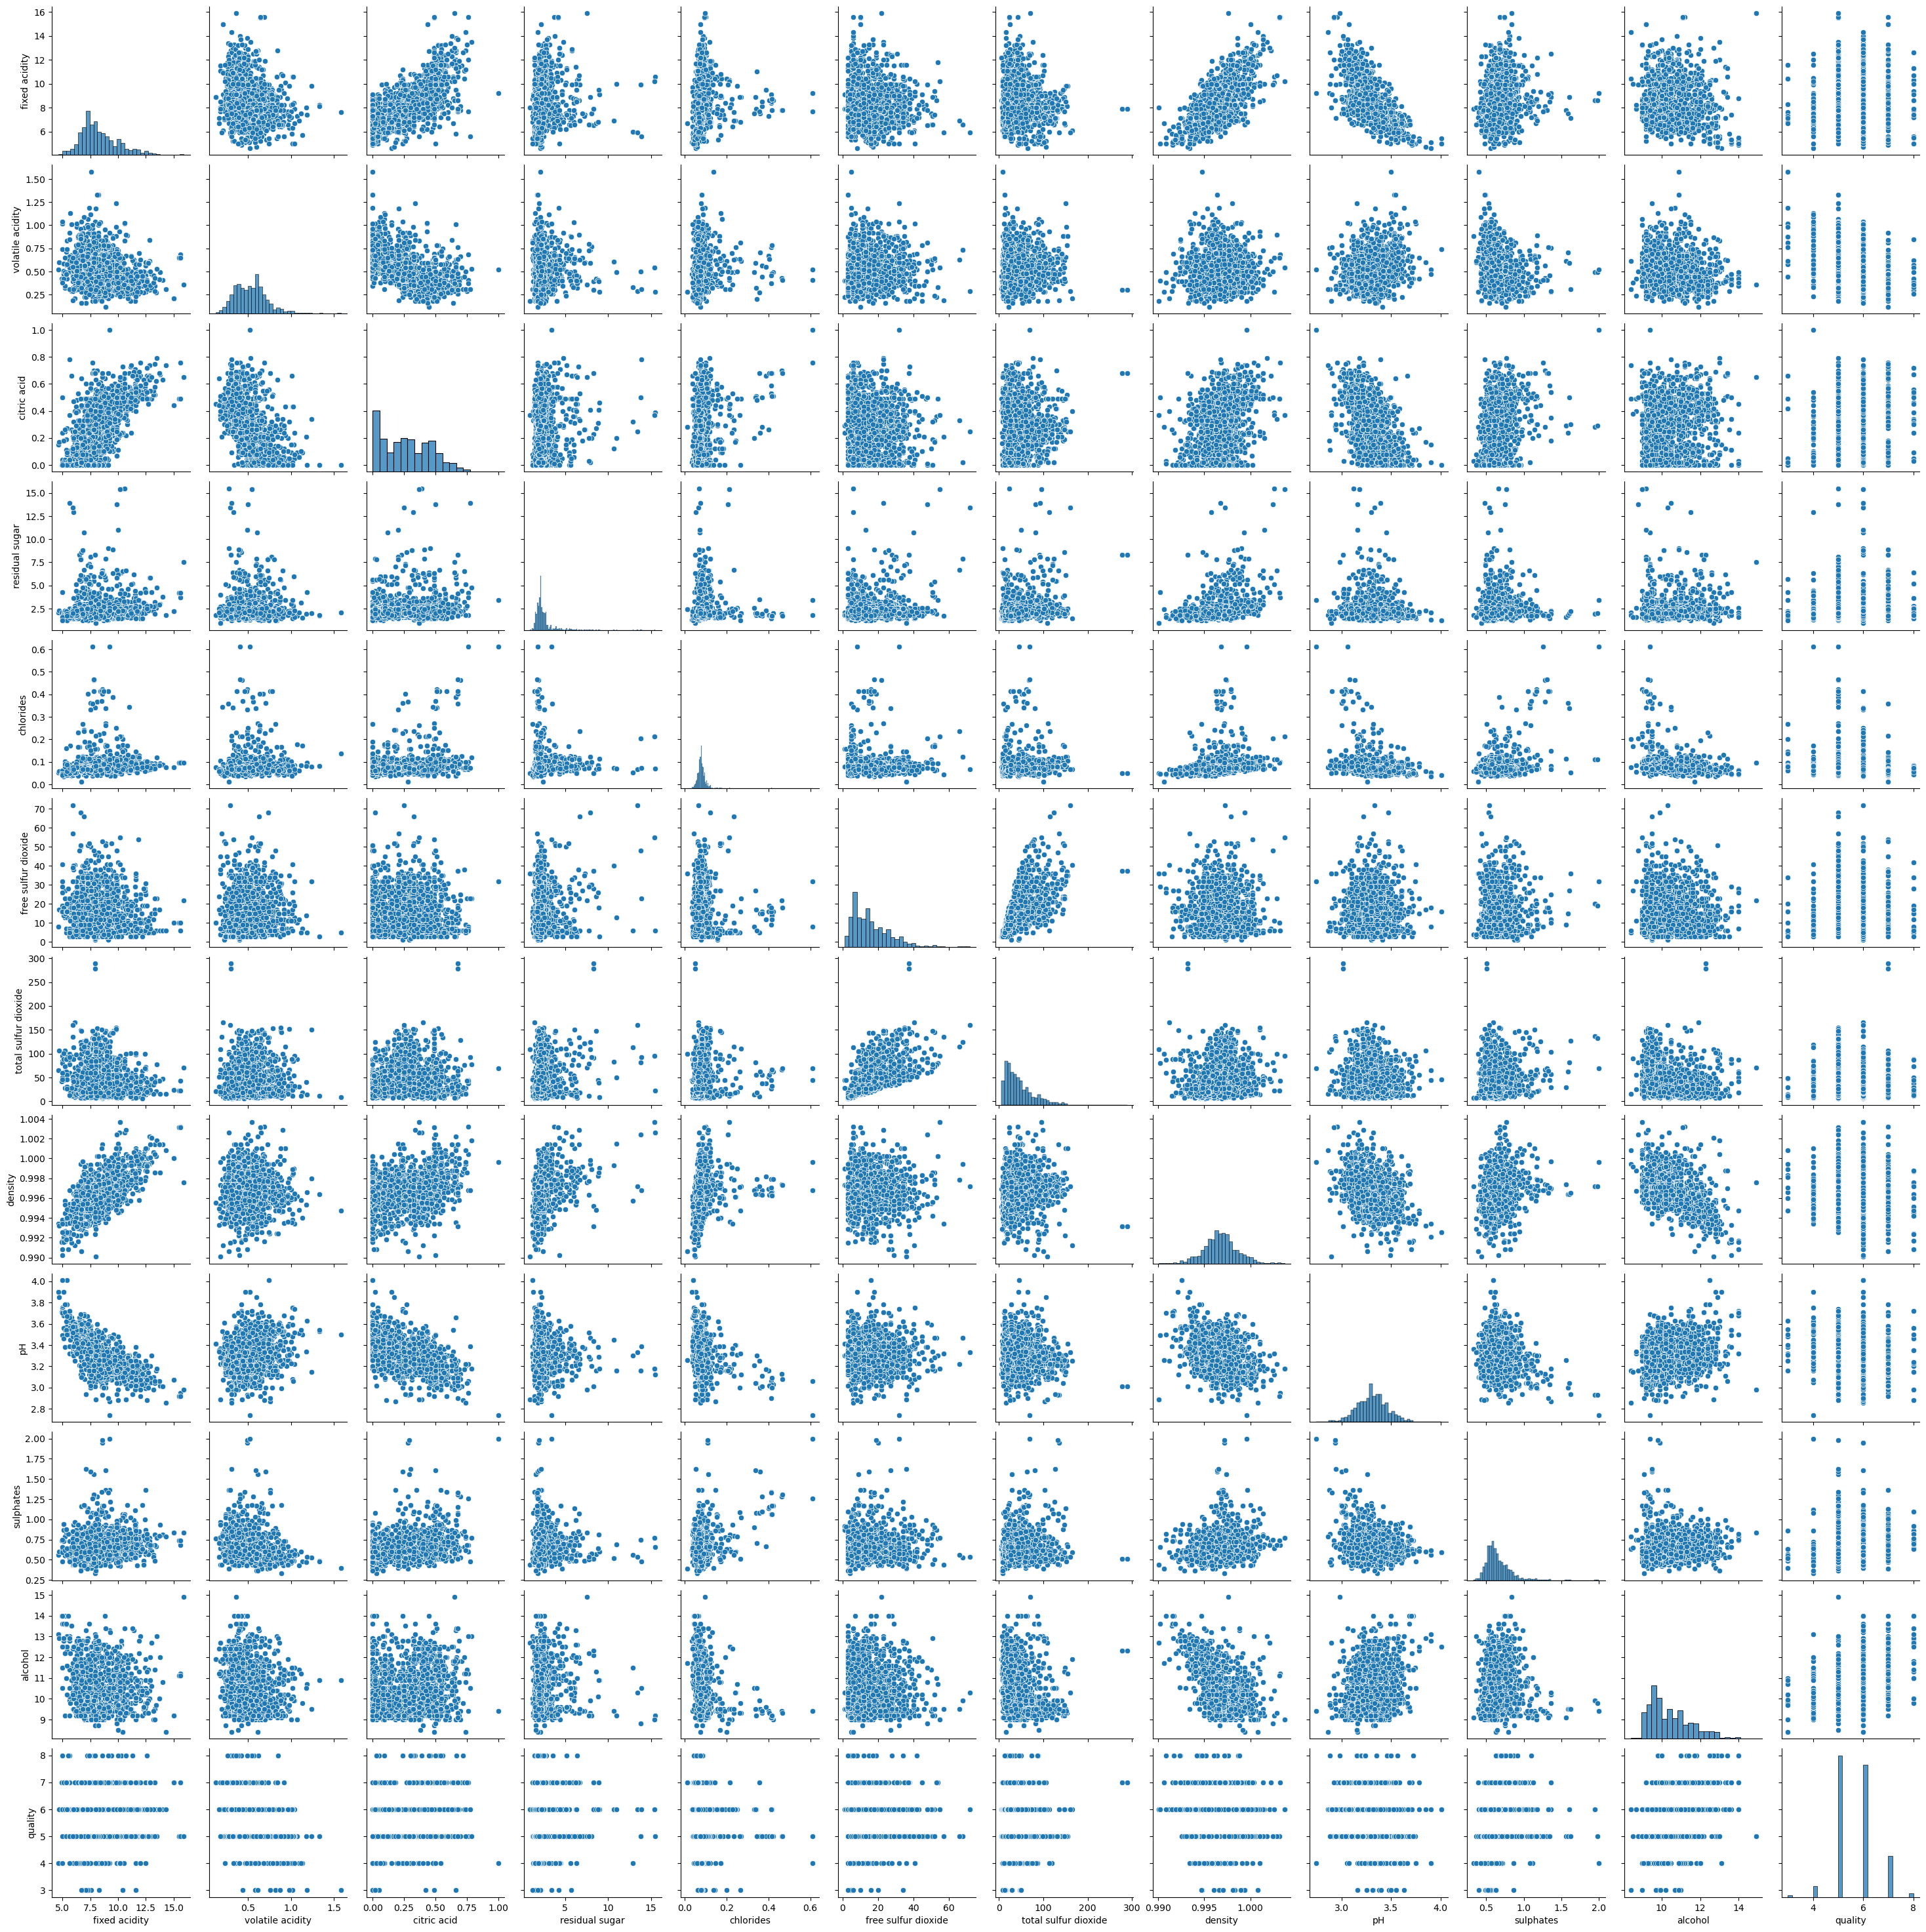

In [209]:
# Using Seaborn's pairplot to visualize pairwise relationships and distributions

sns.pairplot(df)

When we apply this to the all dataset, it is very difficult to see, so let's check a few columns that have a bigger impact on the target variable (`quality`)

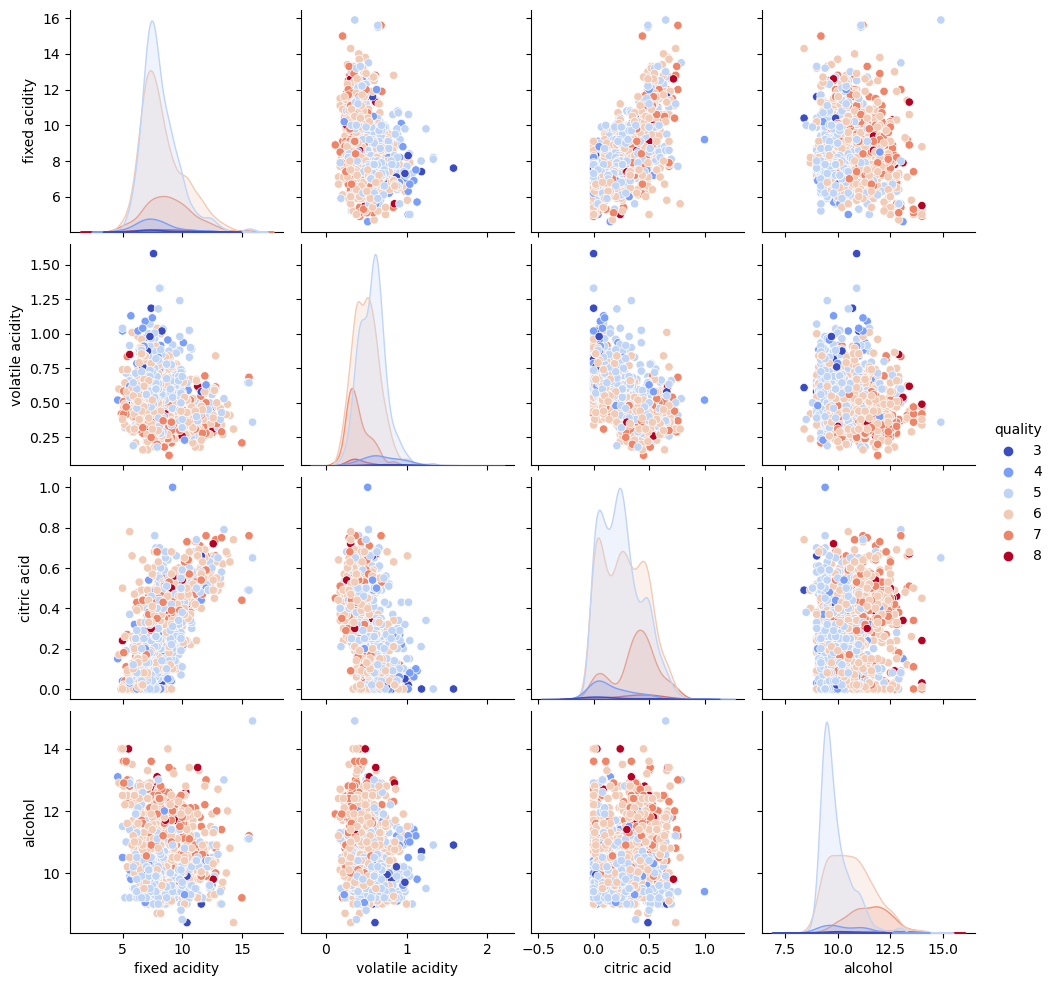

In [210]:
# We will use a subset of columns for clarity and better visualization
# When we do it for the all the dataset, the visual is not easy to see as I dont have a big monitor.
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality']
sns.pairplot(df[cols], hue='quality', palette='coolwarm')

# Display the plot
plt.show()

When we look at this pairplot:

* When we look at the plot of the cross of citric acid (y axis) and alcohol (x axis) we can say that wine samples,that have alcohol amount higher than 12 and citric acid between 0.25 and 0.5, have high quality scores.

* When we look at the plot of the cross of fixed acidity (y axis) and citric acid (x axis), we can say that there is a positive correlation between those 2.

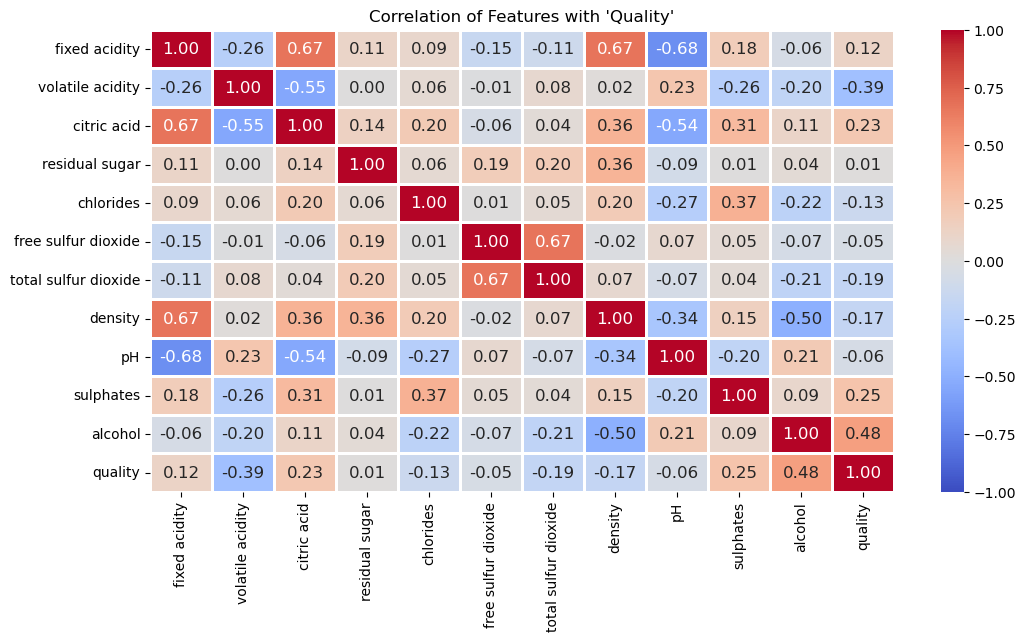

In [211]:
# We can also visualize the correlation matrix.

# Compute the correlation matrix for the dataframe 'df'
correlation = df.corr()

# Filter and sort the 'quality' correlations
quality_correlation = correlation['quality'].sort_values(ascending=False)

# Plotting the correlations of the 'quality' column with other columns using Seaborn's heatmap
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.heatmap(correlation,vmin=-1, vmax=1, annot=True, annot_kws={"size":12},
           linewidths=1, cmap="coolwarm",  fmt=".2f")

# Set the title for the heatmap
plt.title("Correlation of Features with 'Quality'")

# Display the plot
plt.show()

Correlation matrix plot also tells a lot about the correlations of the features with the target. For example:

* Quality and volatile acidity have a negative correlation (-0.39), this says that as volatile acidity increases by 1 unit, the quality score might decrease by 0.39 unit.
* Quality and alcohol have a positive correlation (0.48), this says that as alcohol amount increases by 1 unit, the quality score might increase by 0.48 unit.
* Quality and residual sugar have a positive correlation (0.01), this says that as alcohol amount increases by 1 unit, the residual sugar might increase by 0.01 unit. This tells us that they have a very weak correlation. 

# 3. Stage Three - Data Preparation <a class="anchor"></a>


## 3.1 Select Your Data <a class="anchor"></a>

### Columns Selection: 
#### Included All Columns 

The preliminary analysis did not show any column to be completely irrelevant for predicting wine quality. 

Now we need to assign 0 and 1 labels to the wine samples as per their quality scores.

### Rows Selection: 
- We can drop the duplicates in the dataset so we will prevent duplicated rows to bias our model. Duplicated rows can over represent particular data points.

In [212]:
# This function will drop the duplicated rows and assign the dataset into `df` again
df = df.drop_duplicates()

#### Included the non-duplicated instances

Initial data exploration revealed  extreme outliers, we will remove them later. Also, duplicate records have been removed to ensure each data point is unique.

## 3.2 Clean The Data <a class="anchor"></a>


Previously, I dropped duplicated rows and checked if the dataset had missing values (It did not). So, there is no need to do data cleaning yet. But we can do it after building our model and checking the coefficients and p-values. 

## 3.3 Assigning The Labels

#### Adding low or high quality labels

- We are asked to assign labels to the wine samples as per their quality scores.

- I am considering the wine samples that has a score **lower than 6** as **low quality (0)** and the ones that has a score of 6 or higher will be considered as **high quality (1)**

In [213]:
# This list comprehension method will assign 0 (low quality) if a value of a row is lower than 6 and
# it will assign 1 (high quality) if it is equal to 6 or higher than 6
df['quality'] = [0 if x < 6 else 1 for x in df['quality']]

C:\Users\BERAT\AppData\Local\Temp\ipykernel_2816\996887800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'] = [0 if x < 6 else 1 for x in df['quality']]


In [214]:
# Now if we check the first 5 sample of the data we will see that our last column `quality`'s values has changed.

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
5      9.4        0

In [215]:
df['quality'].value_counts()

1    719
0    640
Name: quality, dtype: int64

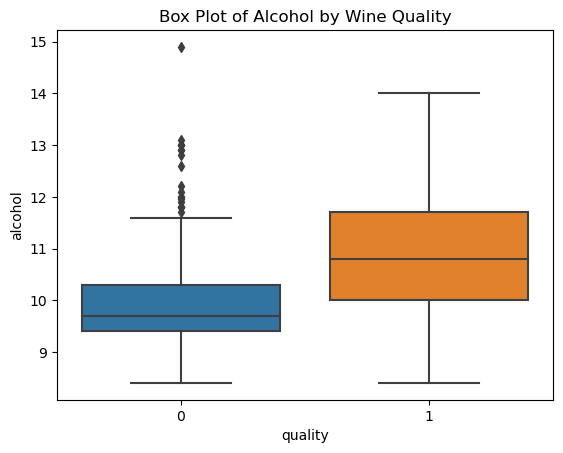

In [216]:
# Let's look at the distribution of alcohol content for each quality label  

sns.boxplot(x='quality', y='alcohol', data=df)
plt.title(f'Box Plot of Alcohol by Wine Quality')
plt.show()

By looking at this plot, we can say: 
- High-quality wines (1) shows a higher median alcohol content compared to the low-quality wines (0). By looking at this, alcohol content can be a good predictoir for quality as having higher alcohol content indicates having higher quality.<br>
<br>
- High-quality wines have a wider interquartile range (IQR), which means high-quality wines have a larger variance in alcohol content than low-quality wines have.<br>
<br>
- There are several outliers in alcohol content for low-quality wines, since normally having higher alcohol content causes having higher quality, we can say that this is an unusual situation. Because even though they have high alcohol content, they have low quality.


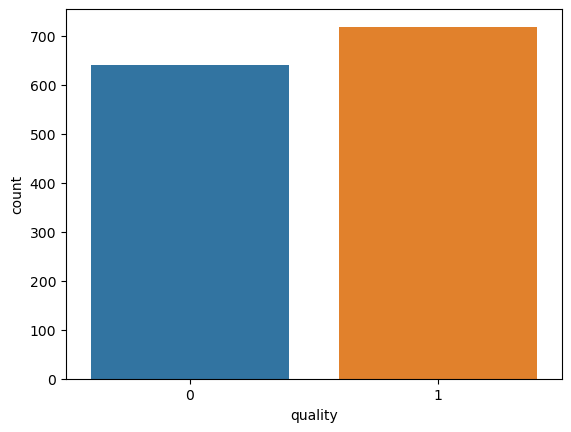

In [217]:
sns.countplot(df, x='quality')
plt.show()

We can say that our labels are almost balanced, there is no big difference in the number of low and high quality wine samples.

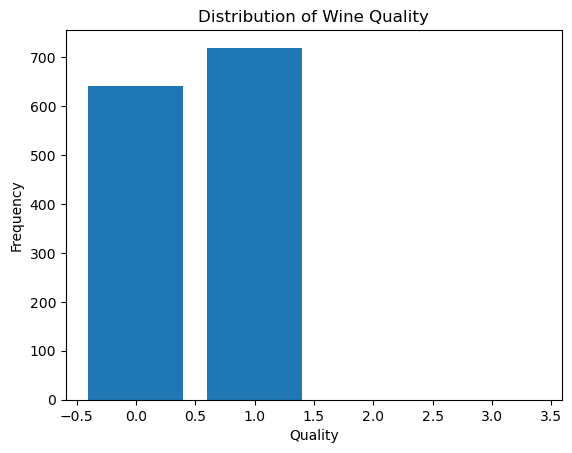

In [218]:
# Plot a histogram for the 'quality' column of the dataframe 'df'
# 'bins' determines the bins' edges. Here, it ranges from 0 to 4.
# 'align' positions the bins' edges to the left.
# 'rwidth' sets the relative width of the bars as a fraction of the bin width.

plt.hist(df['quality'], bins=range(0,5), align='left', rwidth=0.8)

# Label the x-axis as 'Quality'
plt.xlabel('Quality')

# Label the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Set the title for the plot
plt.title('Distribution of Wine Quality')

# Display the plot
plt.show()

### Important

* If we scroll up, we can see that the distribution of quality column was very different than this since the scores ranged between 3 and 8
* As we assigned new labels, the values in the column are either 0 or 1.

# 4. Stage Four - Modelling <a class="anchor"></a> 

* We are going to use Decision Tree technique.

## 4.1. Modelling technique <a class="anchor"></a>
Document the actual modelling technique that is to be used.

Import Models in your code below:

In [219]:
# This code line imports the Decision Tree Classifier model from the sklearn library.
from sklearn.tree import DecisionTreeClassifier

# This code line imports tree from sklearn to visualize the tree with graphviz library
from sklearn import tree

# This code line imports the function to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# This code line imports the functions to calculate evaluation metrics to see our model's accuracy scores.
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# This code line imports Grid search cross validation method, 
# this method find the best parameters from the given range of parameteres
from sklearn.model_selection import GridSearchCV

#### Overview:

Decision Trees approach is a supervised learning model used for regression and classification tasks. The goal of this algorithm is to create a model and make this model to predict the dependent variable's value by using simple decision rules -just like a flow chart- from data columns. (Scikit-learn, n.d.a) In this task, we are required to use it for classification.

A decision tree model classifies items in a dataset by asking a series of questions about their features to split the dataset. It does the asking questions and splitting the dataset process recursively and at the end it will result to a tree shape. (Kingsford & Salzberg, 2008)


The tree is constructed by:

- Starting at the root node with the entire dataset.
- Selecting the best feature to split on to maximize class separation in the resulting nodes.
- Splitting the dataset into subsets based on the selected feature's values, with each subset corresponding to a branch leading to a different child node.
- Recursively repeating the process for each child node, creating further splits (branches) and subsets, until one of the stopping criteria is met (for example, when a maximum tree depth is reached or a node has a minimum number of samples).

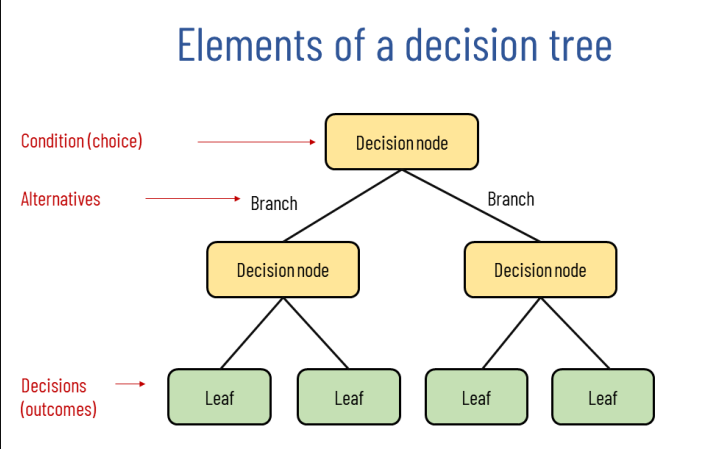

**Reference of the Image:**

*Elements of Decision Trees* (Kosarenko, 2021)


## 4.2. Modelling assumptions <a class="anchor"></a>


These are the modelling assumptions I made: 


- **Starting Point:** In the beginning, the whole training set is considered as the root.
- **Stopping Criteria:** The stopping criterias (such as maximum depth, minimum samples per leaf etc.) are sufficient to prevent overfitting.
- **Feature Independence:** The features are independent of one another within each split.
- **Nonparametric Nature:** There isn't any particular distribution for the feature variables.
- **Class Separation:** The features contain enough information to allow for clear separation of the classes.

## 4.3. Build Model <a class="anchor"></a>

#### Model

The model is the output of the classification tool from the `sklearn.tree` module in the `sklearn` library.


#### Model Description

The model is a Decision Tree Classifier algorithm designed to predict wine quality as a categorical outcome. It classifies the quality of wine into predefined categories based on various physicochemical attributes. The Decision Tree will learn from the features in the dataset to infer a series of decision rules that can predict the binary quality class (e.g., high or low) for each wine sample.

We will discuss the hyperparameters and their settings later

In [220]:
# Firstly we will build the simplest model and see the model score.

# Splitting the dataset
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and fitting the model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Making predictions
y_pred = dtc.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7389705882352942


- This is the score of the most basic model we can fit. Here, we did not do any parameter settings and fit our model and made predictions. As we can see our model works with 73% accuracy.

Here's the process we're following:

**1. Split the Dataset:** We firstly split our dataset. `X` matrix will contain the features which will be used for predicting the dependent variable which is `y` here. Then we split our dataset into 80% training data and 20% testing data. The `random_state` ensures reproducibility of the split. 'X_train' and 'y_train' will be used to train the model. 'X_test' and 'y_test' will be used to evaluate the model's performance on unseen data.

**2. Instantiate the Model:** We begin by creating an instance of the decision tree model.

**3. Fit (Train) the Model:** Next, we "train" or "fit" our model using the training data. This is where the model learns the relationship between our features and the target variable.

**4. Predictions:** We use our trained model to make predictions on our test dataset, allowing us to evaluate the model's performance.

**5. Evaluating the model:** Finally we will calculate the accuracy score and print it.

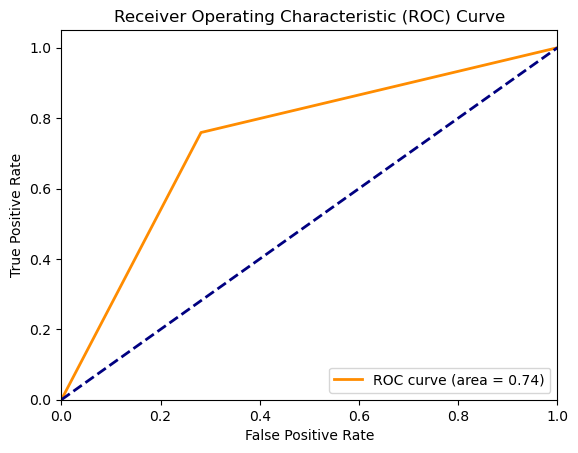

ROC AUC score: 0.7388213030548798


In [221]:
# Plotting AUC-ROC curve

# Getting predicted probabilities for the positive class
y_pred_proba = dtc.predict_proba(X_test)[:, 1]

# Computing ROC curve and ROC area for the predictions
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC score:", roc_auc)

- We are getting the probability estimates for the test set `predict_proba`.
- We are computing the true positive rate (TPR) and false positive rate (FPR) at various threshold settings with the roc_curve function.
- We are computing AUC ROC (the Area Under Curve, the Receiver Operating Characteristic Curve) from prediction scores with the roc_auc_score function then we are plotting it by using matplotlib.

### Interpretations from the curve:

- The area under the ROC curve is 0.74. This means that the model has a 74% chance of correctly distinguishing between the positive and negative class for a randomly chosen instance.
- The orange ROC curve is above the blue dashed line, which represents a random classifier. This means the model is better than random guessing.
- To get the best score, the ROC curve should be on top left of the plot, since it is not there, we can say that we can improve our score by using different methods, since we haven't done any parameter settings yet, we will try to improve this later.

Precision: 0.7323943661971831
Recall: 0.7591240875912408
F1 Score: 0.7455197132616488


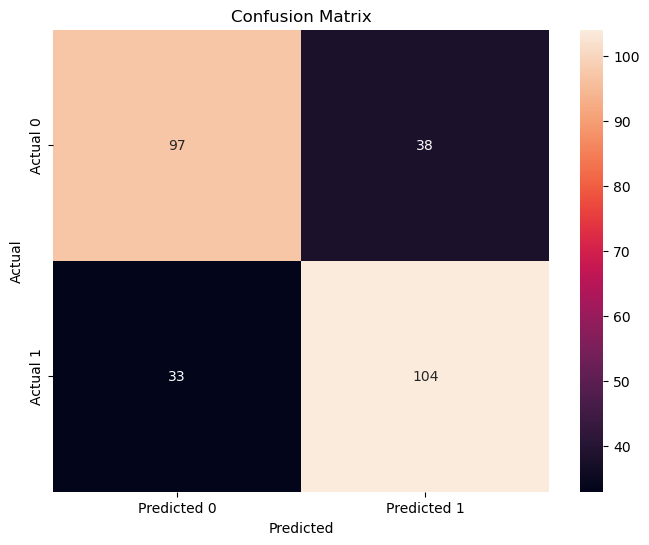

In [222]:
# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Choosing the high or low-quality wine threshold:

- Firstly I assigned the low quality label to the wine samples that have a score of 6 or lower than 6 and I assigned high quality (1) to the ones that have a score more than 6, these are the scores I got:
    - Accuracy: 0.88
    - ROC AUC score: 0.74
    - Precision: 0.52
    - Recall: 0.55
    - F1 Score: 0.54
    - Confusion Matrix:
         [[221  17],
         [ 15  19]] 

- Secondly I assigned the low quality label to the wine samples that have a score lower than 6 and I assigned high quality (1) to the ones that have a score of 6 and more than 6, these are the scores I got:
    - Accuracy: 0.73
    - ROC AUC score: 0.73
    - Precision: 0.73
    - Recall: 0.76
    - F1 Score: 0.74
    - Confusion Matrix:
         [[97  38],
         [ 33  104]] 
         
         
- Eventually I chose the 2nd case since its scores are better than the 1st one,
- In the next cell, I am going to explain every score that are mentioned here.

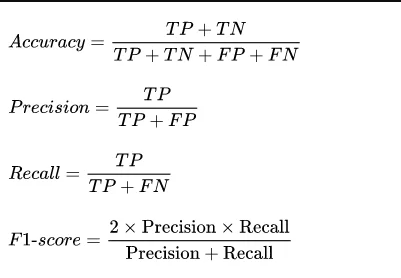

**Reference of the Image:**

*Metric Formulas* (n.a , 2022)

- **Accuracy Score:** This score is the ratio of correct predictions to all the predictions made by the model.(B, 2021)<br>
<br>
- **Precision Score:** This score is the ratio of true positive predictions to the total number of positive predictions made by the model. It reflects the model's accuracy in predicting positive instances and is particularly important when the cost of false positives is high, for example : when we are predicting whether a person has a fatal disease or not, precision is vital because a false prediction can lead to unnecessary treatments.(B, 2021)<br>
<br>
- **Recall Score:** Also known as sensitivity, this score is the ratio of true positive predictions to the actual number of positive instances in the dataset. It measures the model's ability to detect positive instances and is important when the cost of false negatives is significant. for example: if our fraudulent detection model fails to identify fraudulent transactions (false negatives), we won't mark them as fraudulent and there will be financial losses.(B, 2021)<br>
<br>
- **F1 Score:** This score is the harmonic mean of precision and recall scores. It creates a single metric out of these two scores to provide a balanced assessment of the model’s effectiveness. If we have a high F1 score, the model has a good balance between precision and recall. (B, 2021)

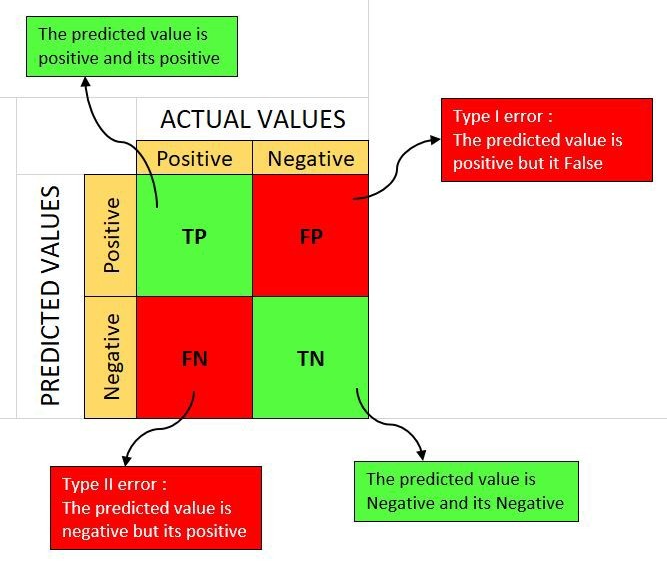

**Reference of the Image:**

*Confusion Matrix* (Suresh, 2020) 

**Confusion Matrix:** It compares the number of actual and predicted values. As we can see above, it gives us the number of True Positive, False Positive, False Negative and True Negative. (B, 2021)

## What do these metrics mean for our business case?

We want to choose a threshold to make high precision and recall scores. If we do that, our model will be more effective at correctly identifying good wines and not mislabeling bad wines as good. If we mislabel bad wines as good, we can sell bad wines at an expensive price and it would damage our business repetation or if we host a wine tasting event, we can present the low quality wines as high quality and damage our business repetation again.<br>
<br>
That's why we should choose the second threshold (if a score is lower than 6 assign low, if it is 6 or higher than 6 it will be labeled as high) since it has both higher precision and recall, which indicates that it is more effective at correctly identifying good wines and not mislabeling bad wines as good.

## Important Note for Scaling:

Decision trees don't require scaling because they are not sensitive the variance in the data.

#### Parameter Settings

Decision Tree Classifiers have several key parameters that can significantly impact the model's performance:

`criterion`: Determines the function used to evaluate the quality of a split. Common options are 'gini' for the Gini impurity and 'entropy' for the information gain.

`max_depth`: Caps the maximum depth of the tree. Limiting depth can prevent overfitting by reducing the complexity of the model.

`min_samples_split`: Specifies the minimum number of samples required to split an internal node. Increasing this value can prevent the model from learning noise in the training data.

`min_samples_leaf`: Sets the minimum number of samples that must be present in a leaf node. Setting this parameter higher can ensure that the tree has a sufficient number of instances per class at the leaf level, which can improve generalization. (Scikit-learn, n.d.)

These parameters play a crucial role in preventing overfitting and ensuring that the decision tree generalizes well to unseen data.

In [223]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the classifier
dtc = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

# Use the best estimator to make predictions
best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best classifier:", accuracy)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best Score: 0.7074282332050903
Accuracy of the best classifier: 0.7389705882352942


    - This is the result of first Grid Search Cross Validation. Grid Search Cross Validation is a search process over specificed parameter ranges for an estimator. (Scikit-learn, n.d.b)
    - Now we will narrow the parameter ranges down and keep doing it.
    - After seeing the best parameters ({'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}) we are narrown down parameter ranges to get better scores.

In [224]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 10, 12, 15],
    'min_samples_split': [15, 20, 25, 30],
    'min_samples_leaf': [3, 5, 7, 10]
}


# Initialize the classifier
dtc = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

# Use the best estimator to make predictions
best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best classifier:", accuracy)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 30}
Best Score: 0.7239758170210967
Accuracy of the best classifier: 0.7242647058823529


    - Since the best criterion is still 'gini', we will keep it and we won't add entropy. We are narrowing down the parameter ranges.

In [225]:

# Define the parameter grid
param_grid = {
    'criterion': ['gini'],
    'max_depth': [6, 7, 8, 9, 10],
    'min_samples_split': [25, 30, 35, 40],
    'min_samples_leaf': [3, 4, 5, 6, 7]
}


# Initialize the classifier
dtc = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

# Use the best estimator to make predictions
best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best classifier:", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 40}
Best Score: 0.7239927281951549
Accuracy of the best classifier: 0.7536764705882353


    - Our score has increased by 3%! We keep narrowing down the parameter ranges.

In [226]:

# Define the parameter grid
param_grid = {
    'criterion': ['gini'],
    'max_depth': [7, 8, 9],
    'min_samples_split': [35, 40, 45, 50],
    'min_samples_leaf': [4, 5, 6]
}


# Initialize the classifier
dtc = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

# Use the best estimator to make predictions
best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best classifier:", accuracy)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 50}
Best Score: 0.7276793641398553
Accuracy of the best classifier: 0.7573529411764706


- Our score has increased by a very small amount! We can stop here as even if we keep narrowing down, the increase will be very small.

Precision: 0.7669172932330827
Recall: 0.7445255474452555
F1 Score: 0.7555555555555554


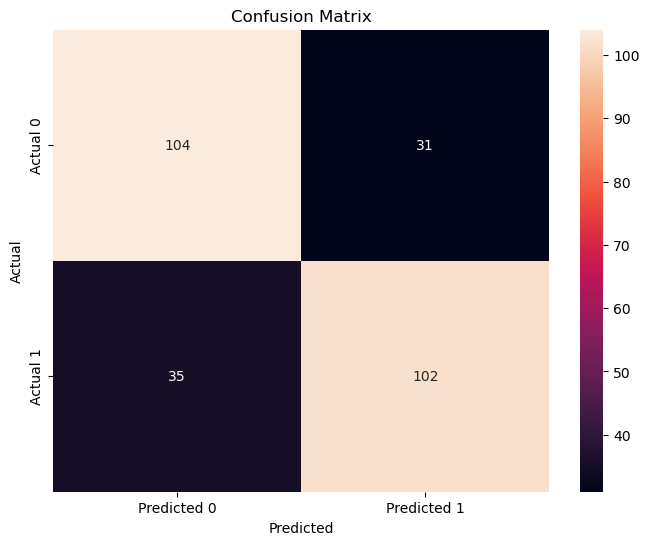

In [227]:
# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Rationale of Parameter Changes

### Business Objective Alignment of the Grid Search:
### Important

- We can see our accuracy, precision and F1 score got better and Recall score got slightly worse. Since there is trade-off between Precision and Recall score (they are inversely related), we can say that this is normal. 

- Since it is more important for us to label high quality wines as more expensive price and to avoid label low-quality wines with expensive prices, having a better precision score is better as it will help us to identify the high-quality wines (true positives) with a higher accuracy. Having a lower recall score is acceptable since  identifying a high-quality wine as low-quality wine will not impact our business reputation as much as labeling the low-quality wine as high-quality wine. Because labeling high-quality wine as low-quality will cause losing money, but the other scenario will cause damage to our business.


### Remove the outliers and run another model

If you remember, we saw that we have outliers (extreme) values in our dataset. These values cause models to produce biased results. Let's remove them and see if there will be difference on the scores.

In [228]:
# Defining function to replace the outliers with their threshold values
def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if low_limit > 0:
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    else:
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [229]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

for col in columns:
    replace_with_thresholds(df, col)

- Now we removed the outliers from our dataset, I will use the previous model to run it without outliers.

In [230]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini'],
    'max_depth': [7, 8, 9],
    'min_samples_split': [35, 40, 45, 50],
    'min_samples_leaf': [4, 5, 6]
}


# Initialize the classifier
dtc = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

# Use the best estimator to make predictions
best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best classifier:", accuracy)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 50}
Best Score: 0.7276793641398553
Accuracy of the best classifier: 0.7573529411764706


### After removing outliers

As we can see the accuracy score didn't change, this is completely normal because decision tree algorithm is robust to outliers, so removing outliers either don't change the results or change them in very little amounts. (Kotu & Deshpande, 2019)

## 4.4. Assess Model <a class="anchor"></a>

#### Model Comparison: 

- Since I explained the different versions of the model above, I will repeat them here shortly in this section.<br>
<br>
- As we can see above, we changed the parameters a few times and we reached the best accuracy score we can. <br>
<br>
- After completing Grid Search CV, we selected our best parameters as {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 50}. These parameters gave us better accuracy, F1, precision scores and worse recall score, but this is a trade-off we can accept since having a better precision score is more important for our business.<br>
<br>
- Finally, removing outliers didn't affect our final result, because decision tree algorithms are not sensitive the outliers. This mean even the dataset has outliers, it either does not affect the result of decision trees or it affects it in very little amounts. 

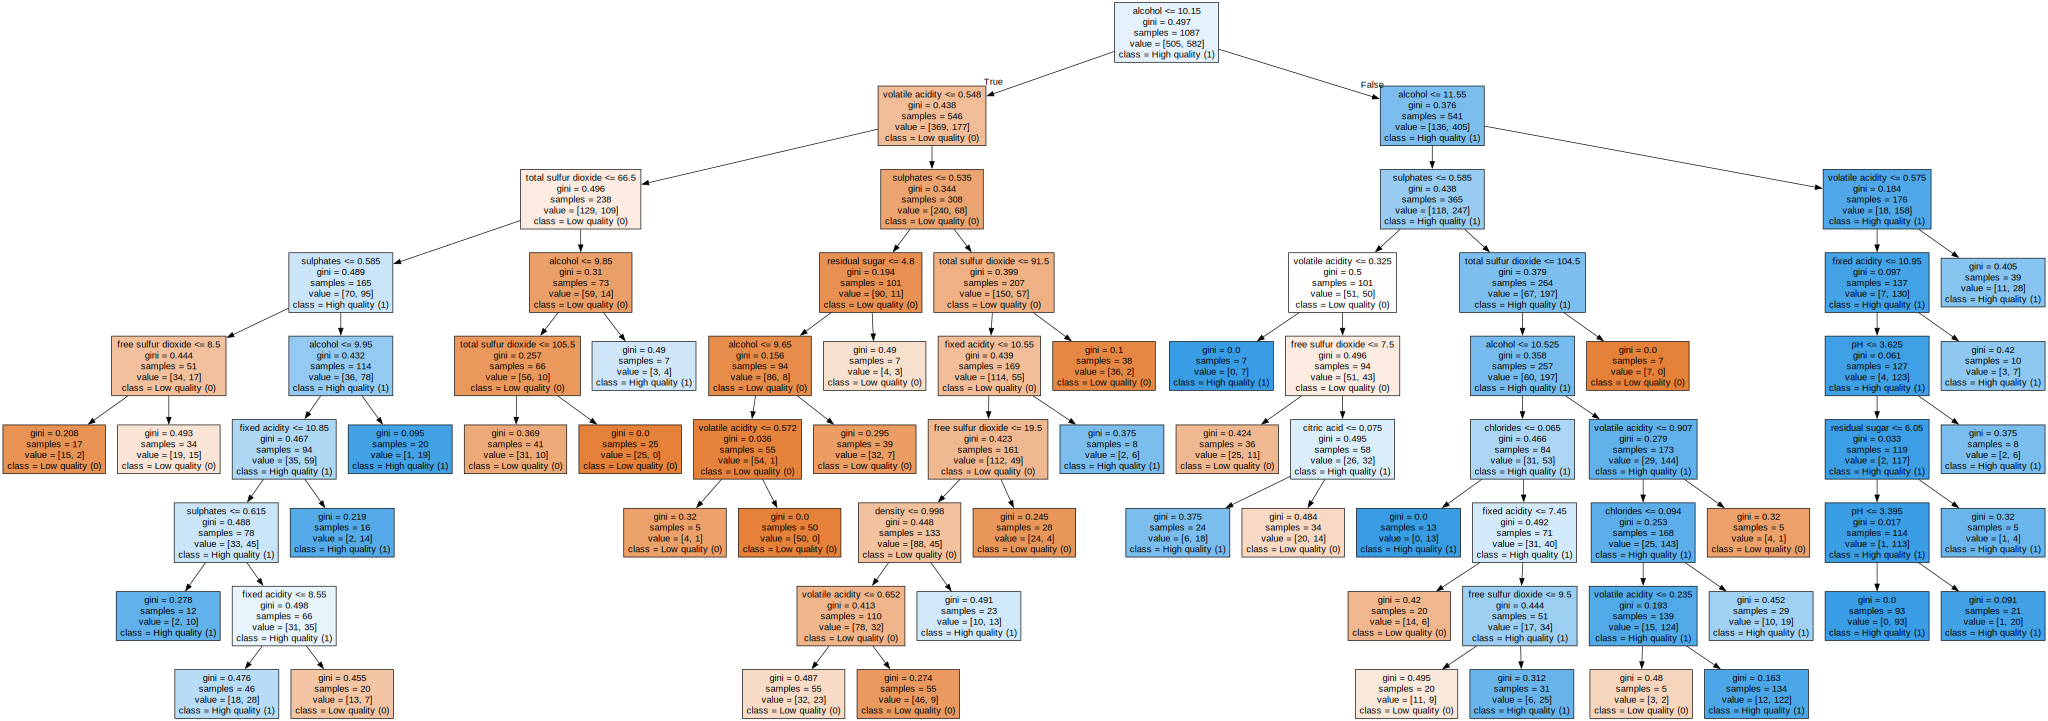

In [231]:
dot_data = tree.export_graphviz(best_dtc, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=['Low quality (0)', 'High quality (1)'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


- This visualization shows us how the algorithm splits the data by using features and Gini impurity measures. We can shortly say that: the tree first asks if the alcohol content in the wine is less than or equal to 10.15, if it is True it goes to left, otherwise to the right, this condition was choosen because it is the best way to split the samples, algorithm figures this out by itself. By following these steps, the algorithm assigns wine sample's labels.

# 5. Stage 5 - Evaluate  <a class="anchor"></a>

- Our primary business objective was to develop a model that can differentiate high and low-quality wine samples with high accuracy. Our modified decision tree model showed a better performance than the previous one did. The increased accuracy score shows that our model predict whether a wine sample has low or high quality better than the previous one, the increased precision score shows that our model predict the high quality wine samples with higher accuracy.



**Business Implications and Strategic Alignment:**

- **Confidence in Quality Assessment:** We can have greater confidence in our wine quality assessments with the improved accuracy and precision. This confidence is key to making informed decisions about pricing, marketing, and inventory management.

- **Aligning with Consumer Expectations:** In the wine industry, consumer trust is paramount. Our enhanced model helps ensure that we align our products with consumer expectations, improving our reputation for quality.

- **Market Competitiveness:** The ability to accurately categorize wine quality not only helps in reinforcing our brand's value proposition but also provides a competitive edge in the market. By using our model's insights, we can tailor our strategies to meet market demands more effectively.

# 6. Stage 6 - Deploy  <a class="anchor"></a>

#### Suggestions for future modelling:

- In future we can apply more advanced models such as random forests or gradient boosting to get better results, these models combine multiple decision trees.

- We can apply different cross validation techniques.

- We can find a more detalied and bigger dataset to build better models.

- We can integrate other data sources such as climate data, regional information etc. to improve model performance.
#### Lessons Learned:

- Decision trees are not sensitive the variance in the data, that's why we don't need to do scaling.

- Decision trees are robust to outliers.

- Data visualization was important in understanding our dataset, revealing patterns and guiding feature selection, significantly impacting our modeling approach.

- Fine tuning the model and running it again is important, we changed the parameters and we had a model that has better scores.

#### Deployment Strategies:

- We can integrate the model with the existing business systems. So, it can provide real-time predictions.

- After the deployment, we should regularly monitor the predictions with the real outcomes.

- We can establish a system that can feed the model with the new data and retrain it.

- User training can be provided so the users who use this model can interpret the results correctly.


# References

### (Scikit-learn references has 'a' and 'b' in their date parentheses, because we are using 2 different citations and we are adding 'a' and 'b' as APA 7 guideline tells us to do it)



- B, H. N. (2021, December 12). Confusion matrix, accuracy, precision, recall, F1 score. Medium. https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd<br>
<br>
- Kingsford, C., & Salzberg, S. L. (2008). What are decision trees? Nature Biotechnology, 26(9), 1011–1013. https://doi.org/10.1038/nbt0908-1011<br>
<br>
- Kosarenko Y.(2021) *Elements of Decision Trees* [Graph] Why Change Consulting https://why-change.com/2021/11/13/how-to-create-decision-trees-for-business-rules-analysis/<br>
<br>
- Kotu, V., & Deshpande, B. (2019). Classification. In Elsevier eBooks (pp. 65–163). https://doi.org/10.1016/b978-0-12-814761-0.00004-6<br>
<br>
- *Metric Formulas* (2022) [Image] Tutorial Example https://www.tutorialexample.com/an-introduction-to-accuracy-precision-recall-f1-score-in-machine-learning-machine-learning-tutorial/<br>
<br>
- Scikit-learn (n.d.a) 1.10. Decision Trees.  https://scikit-learn.org/stable/modules/tree.html<br>
<br>
- Scikit-learn. (n.d.b). sklearn.model_selection.GridSearchCV. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html<br>
<br>
- Suresh A. (2020) *Confusion Matrix* [Image] Medium https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5
